In [5]:
import pickle
with open("metrics", "rb") as pf:
  metrics = pickle.load(pf)

In [6]:
import pandas as pd

In [7]:
metrics

[{'quantity_class_0': 0.22292079064897494,
  'quantity_class_1': 0.22292079064897494,
  'allocation_class_0': 0.034559860049433,
  'allocation_class_1': 0.034559860049433,
  'total_quantity': 0.22292079064897494,
  'total_allocation': 0.034559860049433,
  'kappa': -0.024984143305588388,
  'kappasimulation': 0.003056185472552455,
  'misses': 0.04032465184208141,
  'hits': 0.0013662315460612503,
  'false_alarms': 0.0172799300247165,
  'null_successes': 0.7411507268005136,
  'figure_of_merit': 0.02316792777634182,
  'producer': 0.03277051084146184,
  'user': 0.07327146345242484,
  'initially_developed': 0.1998784597866272},
 {'quantity_class_0': 0.22287954667492874,
  'quantity_class_1': 0.22287954667492874,
  'allocation_class_0': 0.03462302111113657,
  'allocation_class_1': 0.03462302111113657,
  'total_quantity': 0.22287954667492874,
  'total_allocation': 0.03462302111113657,
  'kappa': -0.02498440949460031,
  'kappasimulation': 0.003113930273852339,
  'misses': 0.04031498839888701,
  

In [16]:
import numpy as np

In [80]:
columns = np.array(list(metrics[0].keys()))
tab = np.array(list(metrics[1].values()))

In [82]:
for m in metrics:
  tab = np.vstack([tab, list(m.values())])
tab = tab[1:]

In [104]:
columns

array(['quantity_class_0', 'quantity_class_1', 'allocation_class_0',
       'allocation_class_1', 'total_quantity', 'total_allocation',
       'kappa', 'kappasimulation', 'misses', 'hits', 'false_alarms',
       'null_successes', 'figure_of_merit', 'producer', 'user',
       'initially_developed'], dtype='<U19')

In [98]:
mean_hit = np.multiply(tab[:, 9], np.full(len(tab[:, 9]), 100.0)).mean()

In [109]:
mean_misses = np.multiply(tab[:, 8], np.full(len(tab[:, 8]), 100.0)).mean()
mean_false_alarms = np.multiply(tab[:, 10], np.full(len(tab[:, 10]), 100.0)).mean()
mean_figure_of_merit = np.multiply(tab[:, 12], np.full(len(tab[:, 12]), 100.0)).mean()
mean_null_successes = np.multiply(tab[:, 11], np.full(len(tab[:, 11]), 100.0)).mean()
mean_initially_developed = np.multiply(tab[:, 15], np.full(len(tab[:, 15]), 100.0)).mean()
quantity_error = np.subtract(np.multiply(tab[:, 8], np.full(len(tab[:, 8]), 100.0)), np.multiply(tab[:, 10], np.full(len(tab[:, 10]), 100.0)))
mean_quantity_error = quantity_error.mean()
total_error = np.add(np.multiply(tab[:, 8], np.full(len(tab[:, 8]), 100.0)), np.multiply(tab[:, 10], np.full(len(tab[:, 10]), 100.0)))
mean_total_error = total_error.mean()
allocation_error = np.subtract(total_error, quantity_error)
mean_allocation_error = allocation_error.mean()

In [ ]:
# wayyy better to just use pandas but pandas doesn't work in my GRASS environment for some reason

In [8]:
df_global = pd.DataFrame.from_records(metrics)
df_global["hits"] *= 100
df_global["misses"] *= 100
df_global["false_alarms"] *= 100
df_global["figure_of_merit"] *= 100
df_global["null_successes"] *= 100
df_global["initially_developed"] *= 100
df_global["quantity_error"] = df_global["misses"] - df_global["false_alarms"]
df_global["total_error"] = df_global["misses"] + df_global["false_alarms"]
df_global["allocation_error"] = df_global["total_error"] - df_global["quantity_error"]
df_global

,quantity_class_0,quantity_class_1,allocation_class_0,allocation_class_1,total_quantity,total_allocation,kappa,kappasimulation,misses,hits,false_alarms,null_successes,figure_of_merit,producer,user,initially_developed,quantity_error,total_error,allocation_error
0,0.222921,0.222921,0.034560,0.034560,0.222921,0.034560,-0.024984,0.003056,4.032465,0.136623,1.727993,74.115073,2.316793,0.032771,0.073271,19.987846,2.304472,5.760458,3.455986
1,0.222880,0.222880,0.034623,0.034623,0.222880,0.034623,-0.024984,0.003114,4.031499,0.137589,1.731151,74.111915,2.331931,0.033002,0.073627,19.987846,2.300348,5.762650,3.462302
2,0.222882,0.222882,0.034691,0.034691,0.222882,0.034691,-0.025271,0.002831,4.035165,0.133923,1.734528,74.108537,2.268497,0.032123,0.071676,19.987846,2.300637,5.769693,3.469057
3,0.222921,0.222921,0.034535,0.034535,0.222921,0.034535,-0.024890,0.003147,4.031290,0.137799,1.726768,74.116298,2.337213,0.033052,0.073904,19.987846,2.304522,5.758057,3.453535
4,0.222938,0.222938,0.034152,0.034152,0.222938,0.034152,-0.023467,0.004507,4.013826,0.155263,1.707610,74.135456,2.642005,0.037241,0.083346,19.987846,2.306216,5.721436,3.415220
5,0.213170,0.213170,0.053647,0.053647,0.213170,0.053647,-0.041263,0.000700,4.011783,0.157305,2.682363,73.160703,2.295936,0.037731,0.055396,19.987846,1.329421,6.694146,5.364725
6,0.222868,0.222868,0.034309,0.034309,0.222868,0.034309,-0.023664,0.004414,4.014643,0.154446,1.715450,74.127615,2.624602,0.037045,0.082596,19.987846,2.299192,5.730093,3.430901
7,0.222964,0.222964,0.034277,0.034277,0.222964,0.034277,-0.024120,0.003837,4.022612,0.146476,1.713866,74.129199,2.489835,0.035134,0.078736,19.987846,2.308746,5.736479,3.427733
8,0.222901,0.222901,0.034315,0.034315,0.222901,0.034315,-0.023893,0.004145,4.018299,0.150790,1.715769,74.127296,2.562332,0.036168,0.080785,19.987846,2.302530,5.734068,3.431538
9,0.211307,0.211307,0.057107,0.057107,0.211307,0.057107,-0.043573,0.000963,3.998484,0.170605,2.855368,72.987698,2.428723,0.040921,0.056380,19.987846,1.143116,6.853852,5.710736


In [9]:
df_global["figure_of_merit"].mean()

2.4769211242215703

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\1269848883.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


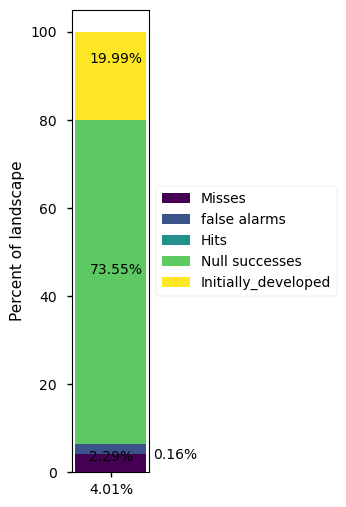

In [11]:
import numpy as np
import matplotlib.pyplot as plt

width = 0.1       # the width of the bars: can also be len(x) sequence
plt.style.use('seaborn-v0_8-notebook')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.GnBu)
fig, ax = plt.subplots()
cmap = plt.cm.get_cmap('viridis', 5)
ax.set_prop_cycle(color=cmap.colors)
fig.set_size_inches(1, 6)
ax.bar([""], df_global["misses"].mean(), width, label='Misses')
ax.bar([""], df_global["false_alarms"].mean(), width, bottom=df_global["misses"].mean(),
       label='false alarms')
ax.bar([""], df_global["hits"].mean(), width, bottom=df_global["misses"].mean() + df_global["false_alarms"].mean(),
       label='Hits')
ax.bar([""], df_global["null_successes"].mean(), width, bottom=df_global["misses"].mean() + df_global["false_alarms"].mean() + df_global["hits"].mean(),
       label='Null successes')
ax.bar([""], df_global["initially_developed"].mean(), width, bottom=df_global["misses"].mean() + df_global["false_alarms"].mean() + df_global["hits"].mean() + df_global["null_successes"].mean(),
       label='Initially_developed')
ax.text(-0.03, -5, f'{df_global["misses"].mean():.2f}%', color='black')
ax.text(-0.03, 2.5, f'{df_global["false_alarms"].mean():.2f}%', color='black')
ax.text(0.06, 3, f'{df_global["hits"].mean():.2f}%', color='black')
ax.text(-0.03, 45, f'{df_global["null_successes"].mean():.2f}%', color='black')
ax.text(-0.03, 93, f'{df_global["initially_developed"].mean():.2f}%', color='black')
plt.ylabel('Percent of landscape')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\2504624686.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


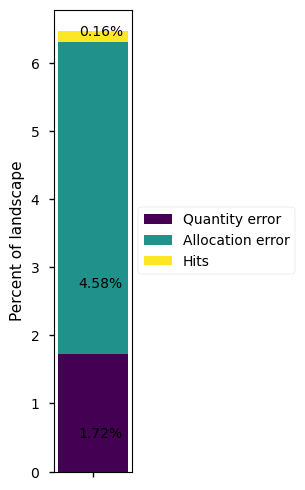

In [15]:
import numpy as np
import matplotlib.pyplot as plt


width = 0.1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(1, 6)
cmap = plt.cm.get_cmap('viridis', 3)
ax.set_prop_cycle(color=cmap.colors)
ax.bar([""], df_global["quantity_error"].mean(), width, label='Quantity error')
ax.bar([""], df_global["allocation_error"].mean(), width, bottom=df_global["quantity_error"].mean(),
       label='Allocation error')
ax.bar([""], df_global["hits"].mean(), width, bottom=df_global["total_error"].mean(),
       label='Hits')
ax.text(-0.02, 0.5, f'{df_global["quantity_error"].mean():.2f}%', color='black')
ax.text(-0.02, 2.7, f'{df_global["allocation_error"].mean():.2f}%', color='black')
ax.text(-0.02, 6.4, f'{df_global["hits"].mean():.2f}%', color='black')
plt.ylabel('Percent of landscape')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()